In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

import statsmodels.api as sm
import statsmodels.formula.api as smf



In [2]:
Smarket = pd.read_csv(r'C:/Users/hynni/Downloads/Smarket.csv')
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [3]:
Smarket.isna().any()


Year         False
Lag1         False
Lag2         False
Lag3         False
Lag4         False
Lag5         False
Volume       False
Today        False
Direction    False
dtype: bool

In [4]:
Smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [5]:
Smarket["Direction"].value_counts()

Up      648
Down    602
Name: Direction, dtype: int64

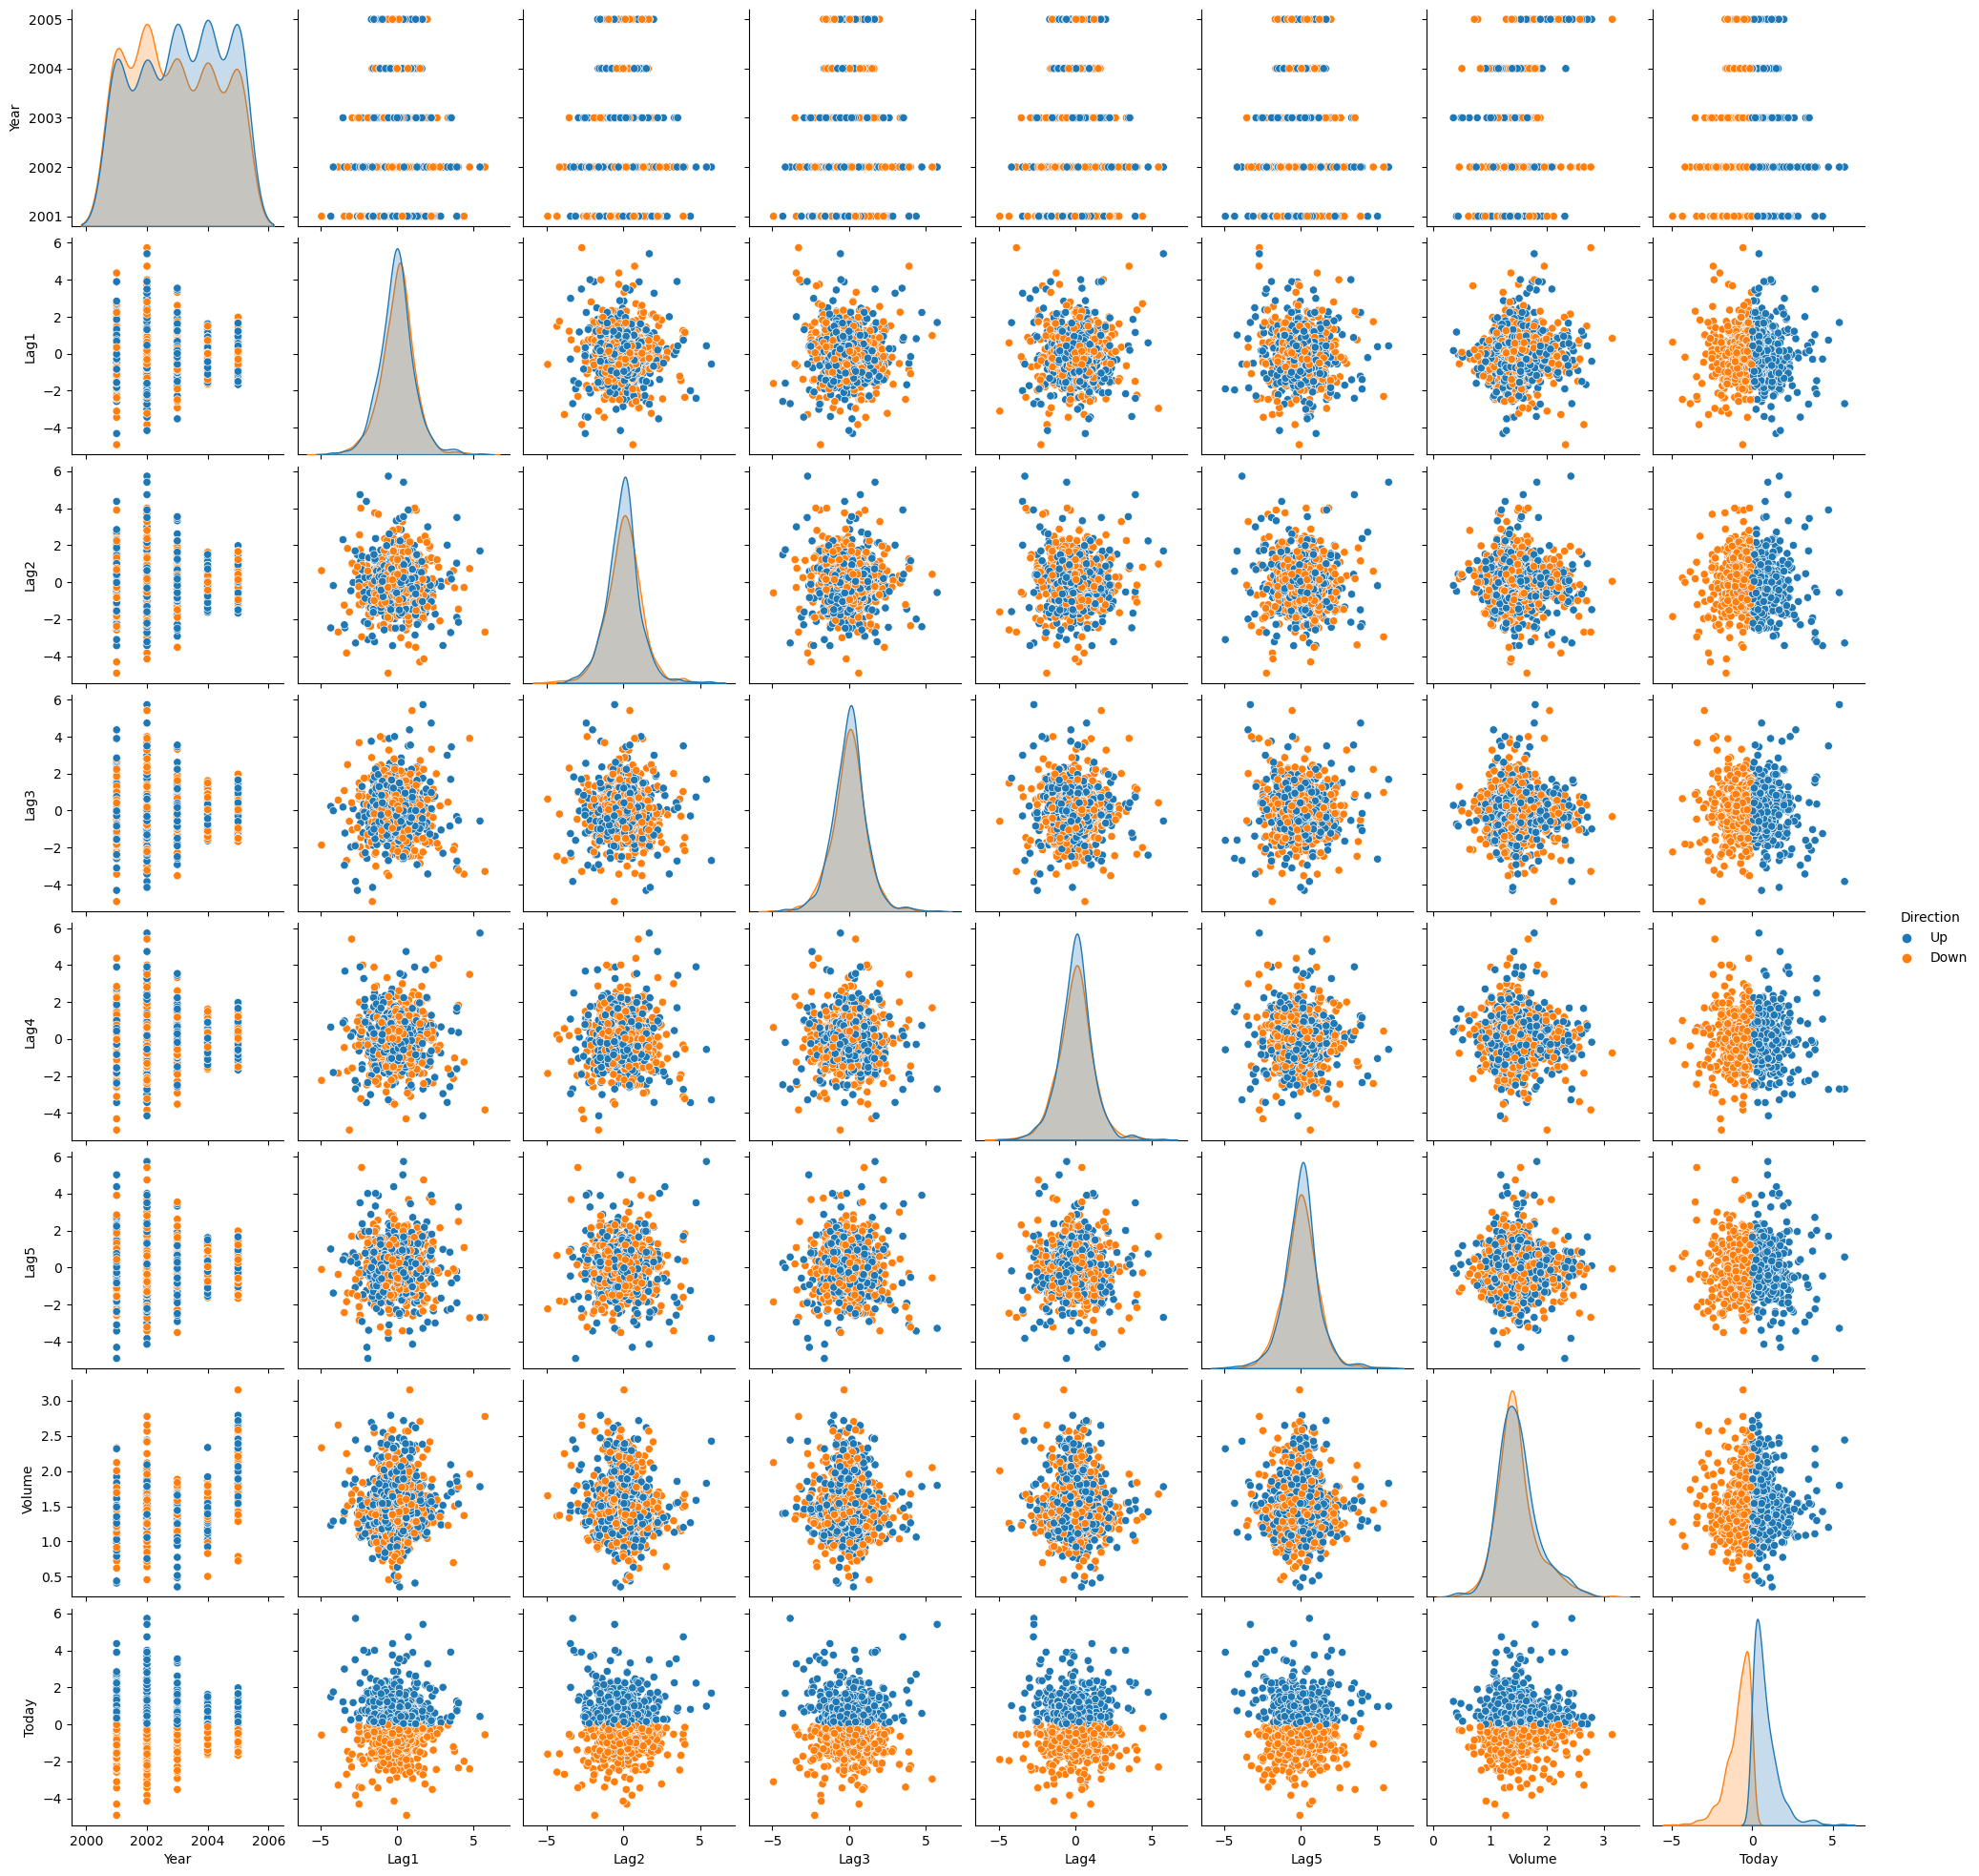

In [6]:
sns.pairplot(Smarket, hue ="Direction")

In [7]:
Smarket.corr()

C:\Users\hynni\AppData\Local\Temp\ipykernel_24236\1907124636.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Smarket.corr()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


In [8]:
y = Smarket["Direction"]=="Up"
x = sm.add_constant(Smarket.drop(columns=["Direction", "Year", "Today"]))

In [9]:
logit_mod = sm.Logit(y, x)
logit_est = logit_mod.fit()

print(logit_est.summary())

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Fri, 12 Apr 2024   Pseudo R-squ.:                0.002074
Time:                        09:03:53   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

In [10]:
log_reg = LogisticRegression()
log_reg.fit(x, y)

LogisticRegression()

In [11]:
log_reg_probs = log_reg.predict_proba(x)
pd.DataFrame(log_reg_probs, columns=log_reg.classes_)

,False,True
0,0.492657,0.507343
1,0.518256,0.481744
2,0.518703,0.481297
3,0.484652,0.515348
4,0.489010,0.510990
...,...,...
1245,0.480407,0.519593
1246,0.493903,0.506097
1247,0.460851,0.539149
1248,0.473857,0.526143


In [12]:
log_reg_pred = log_reg.predict(x)
pd.DataFrame(confusion_matrix(y, log_reg_pred), columns =['Predown', 'PredUp'], index = ['ActualDown', 'ActualUp'])


,Predown,PredUp
ActualDown,144,458
ActualUp,141,507


In [13]:
log_reg.score(x,y)

0.5208

In [14]:
train = (Smarket['Year']<2005)
x_train = Smarket[train].drop(columns=['Direction', 'Year', 'Today'])
y_train = Smarket.loc[train, 'Direction']

x_test = Smarket[~train].drop(columns=['Direction', 'Year', 'Today'])
y_test = Smarket.loc[~train, 'Direction']

In [15]:

log_reg.fit(x_train, y_train)

LogisticRegression()

In [16]:
log_reg_pred = log_reg.predict(x_test)
log_reg.score(x_test,y_test)

0.48412698412698413

In [17]:
x_train = Smarket.loc[train,['Lag1', 'Lag2']]
y_train = Smarket.loc[train,['Direction']]
x_test = Smarket.loc[~train,['Lag1', 'Lag2']]
y_test = Smarket.loc[~train,['Direction']]

In [18]:
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg.score(x_test,y_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5595238095238095

In [19]:
lda_cl = LinearDiscriminantAnalysis()
lda_cl.fit(x_train, y_train)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [20]:
pd.Series(lda_cl.priors_, index = lda_cl.classes_)

Down    0.491984
Up      0.508016
dtype: float64

In [21]:
pd.DataFrame(lda_cl.means_,index = lda_cl.classes_, columns=x_train.columns)

,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325


In [22]:
lda_pred = lda_cl.predict(x_test)
pd.DataFrame(confusion_matrix(y_test, lda_pred), columns =['Predown', 'PredUp'], index = ['ActualDown', 'ActualUp'])


,Predown,PredUp
ActualDown,35,76
ActualUp,35,106


In [23]:
lda_cl.score(x_test,
             y_test)

0.5595238095238095

In [24]:
#QDA Analysis


In [25]:
qda_cl = QuadraticDiscriminantAnalysis()
qda_cl.fit(x_train, y_train)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QuadraticDiscriminantAnalysis()

In [26]:
pd.Series(qda_cl.priors_, index=qda_cl.classes_)

Down    0.491984
Up      0.508016
dtype: float64

In [27]:
pd.DataFrame(qda_cl.means_,index = qda_cl.classes_, columns=x_train.columns)

,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325


In [28]:
qda_pred = qda_cl.predict(x_test)
pd.DataFrame(confusion_matrix(y_test, qda_pred), columns =['Predown', 'PredUp'], index = ['ActualDown', 'ActualUp'])


,Predown,PredUp
ActualDown,30,81
ActualUp,20,121


In [29]:
qda_cl.score(x_test,y_test)

0.5992063492063492

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_1_clf = KNeighborsClassifier(n_neighbors=1)
knn_1_clf.fit(x_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [31]:
knn_1_clf.predict(x_test)
knn_1_clf.score(x_test, y_test)

0.5

In [32]:
knn_1_clf = KNeighborsClassifier(n_neighbors=3)
knn_1_clf.fit(x_train, y_train)
knn_1_clf.predict(x_test)
knn_1_clf.score(x_test, y_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.5317460317460317

In [33]:
knn_scores=[]

In [34]:
for i in range(1,15,2):
    knn_1_clf = KNeighborsClassifier(i)
    knn_1_clf.fit(x_train, y_train)
    knn_1_clf.predict(x_test)
    knn_scores.append(knn_1_clf.score(x_test, y_test))
print(knn_scores)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[0.5, 0.5317460317460317, 0.48412698412698413, 0.4642857142857143, 0.49603174603174605, 0.5317460317460317, 0.503968253968254]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


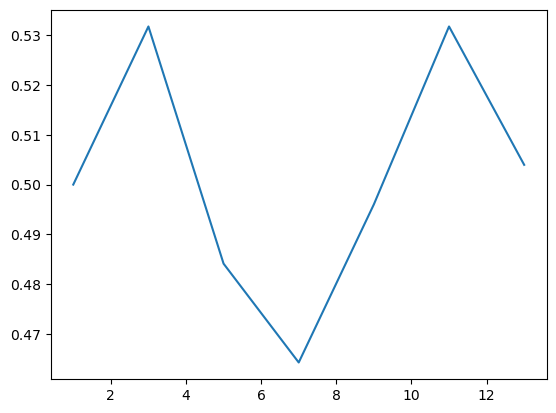

In [35]:
fig = plt.figure()
ax = plt.axes()
ax.plot(range(1,15,2), knn_scores)

In [36]:
x =[4, 5, 10, 4, 3, 11, 14, 8, 10, 12]
y = [21,19,24,17,16,25,24,22,21,21]
classes = [0,0,1,0,0,1,1,0,1,1]


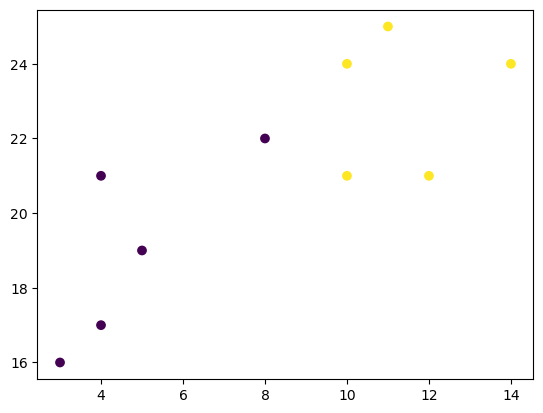

In [37]:
plt.scatter(x,y, c=classes)

In [38]:
data = list(zip(x, y))

In [39]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data, classes)

KNeighborsClassifier(n_neighbors=1)

In [40]:
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

In [41]:
prediction = knn.predict(new_point)
print(prediction)

[0]


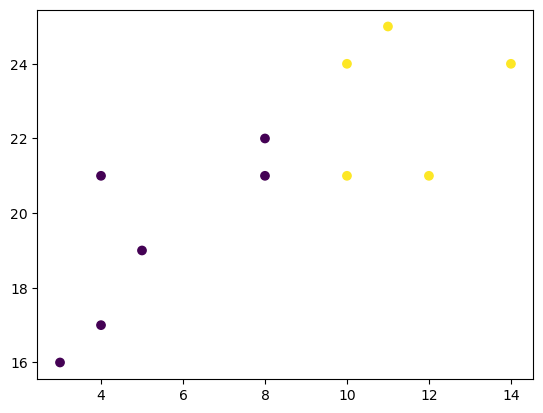

In [42]:
plt.scatter(x+[new_x], y+[new_y], c=classes+[prediction[0]])

In [43]:
Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [44]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [45]:
nb_pred = nb.predict(x_test)
nb.score(x_test, y_test)

0.5952380952380952